In [1]:
# Ignore warnings (primarily for future deprecation warnings)
import warnings
warnings.filterwarnings('ignore')

# Raster Analysis
import rasterio
import earthpy.plot as ep
from rasterio.merge import merge

# Vector Analysis
from shapely.geometry import box, mapping, Polygon

# General data manipulation
import geopandas as gpd
import pandas as pd
import numpy as np

# Saving and Accessing Data
import os
import pickle
import json

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import folium
import seaborn as sns

# Google Earth Engine
import ee
import geemap

# Machine learning

# Keras
import keras
from keras import Sequential
from keras.layers import Conv1D, Dropout, Dense, Input, GlobalMaxPooling1D
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

from importlib import reload
from tqdm import tqdm

import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, os.path.join('src'))

from split_images import split_geometry, haversine, calc_segment_count
import feature_extraction as fe

from analysis_image import AnalysisImage
from keras.preprocessing import image

from eloisa import Eloisa

In [2]:
import analysis_image
reload(analysis_image)
from analysis_image import AnalysisImage

In [3]:
ee.Authenticate()
ee.Initialize()

In [4]:
SEED = 2024
keras.utils.set_random_seed(SEED)
FEATURES = ['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B11', 'B12']
years = [2018, 2019, 2020, 2021, 2022, 2023]

In [57]:
import time

In [5]:
for year in tqdm([2023]):
    try:
        tegucigalpa_image = AnalysisImage(presets='Tegucigalpa', year=year, feature_bands=FEATURES)

        img_height = haversine(coords=tegucigalpa_image.get_bounds(side='ceiling'))
        img_width = haversine(coords=tegucigalpa_image.get_bounds(side='left'))

        x_num_parts, y_num_parts = calc_segment_count(img_height, img_width, 200, 200)

        folder_path = os.path.join('image_clips', 'tegucigalpa', '200x200', str(year))
        files = tegucigalpa_image.extract_clips_to_folder(folder_path, 'tegucigalpa', x_num_parts, y_num_parts)

    except Exception as e:
        print(f"Failed at year {year}")
        print(f"Error: {e}")
        # time.sleep(1800)

100%|██████████| 1/1 [2:33:12<00:00, 9192.68s/it]


In [5]:
from tensorflow.keras.applications import EfficientNetB7 as effnet
from tensorflow.keras.applications.efficientnet import preprocess_input as effnet_p

In [37]:


for year in tqdm([2019, 2020, 2021, 2022, 2023]):
    try:
        
        tegu_600_eloisa = Eloisa(name="tegu_600x600", db_folder="eloisa_databases", seed=SEED, image_shape=(600, 600, 3))
        folder_path = os.path.join('image_clips', 'tegucigalpa', '600x600', str(year))
        tegu_600_eloisa.import_images_by_year(folder_path=folder_path, year=year, bands=[1, 2, 3])

        tegu_600_eloisa.extract_features(year=year, model=effnet, preprocess_input=effnet_p)

        tegu_600_eloisa.update_database()

    except Exception as e:
        print(f"Failed at year {year}")
        print(f"Error: {e}")
        continue

# tegu_600_eloisa.close_db()

The database already exists. Connecting to it.


100%|██████████| 391/391 [00:51<00:00,  7.53it/s]


13/13 ━━━━━━━━━━━━━━━━━━━━ 708s 42s/step


100%|██████████| 391/391 [01:07<00:00,  5.76it/s]


13/13 ━━━━━━━━━━━━━━━━━━━━ 665s 39s/step


100%|██████████| 391/391 [01:04<00:00,  6.06it/s]


13/13 ━━━━━━━━━━━━━━━━━━━━ 667s 42s/step


100%|██████████| 391/391 [00:56<00:00,  6.98it/s]


13/13 ━━━━━━━━━━━━━━━━━━━━ 647s 40s/step


100%|██████████| 391/391 [00:53<00:00,  7.31it/s]


13/13 ━━━━━━━━━━━━━━━━━━━━ 739s 48s/step


100%|██████████| 5/5 [1:08:47<00:00, 825.53s/it]


In [36]:
import eloisa
reload(eloisa)
from eloisa import Eloisa

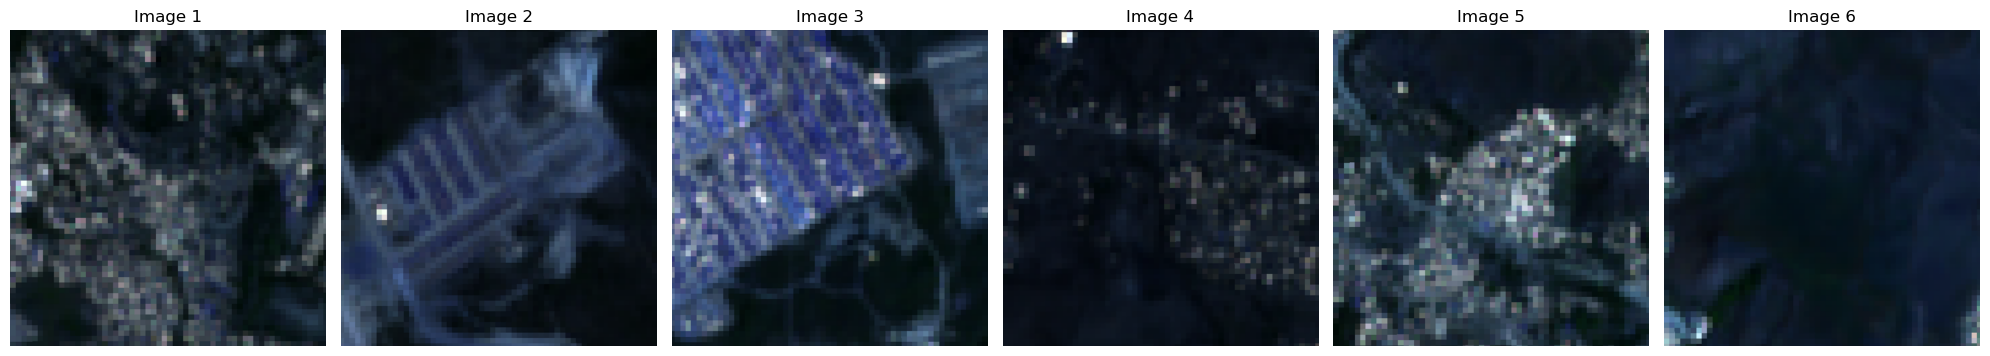

In [41]:
tegu_600_eloisa.show_images_sample(year=2023, rows=1, cols=6)

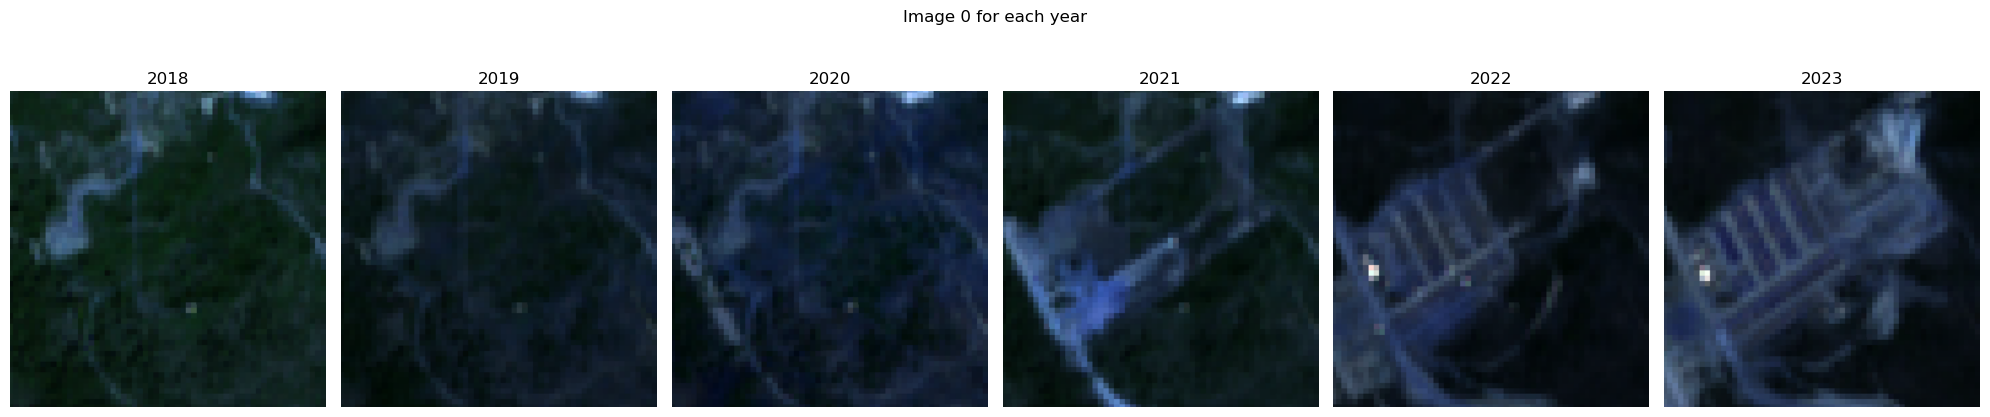

In [52]:
years = [2018, 2019, 2020, 2021, 2022, 2023]
image_num = 0

fig, axes = plt.subplots(1, len(years), figsize=(20, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(tegu_600_eloisa._data[years[i]]["image_list"][image_num])
    ax.axis("off")
    ax.set_title(f"{years[i]}")

# Set the title
plt.tight_layout()
plt.suptitle(f"Image {image_num} for each year")


plt.show()